# Quick Data Science Concept Review
coding up a couple quick concepts while I do review to make it more interresting

In [305]:
#database
import sqlite3

#structures and linalg
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('max_columns',None)
import numpy as np

#stats
import statsmodels.api as sm
import scipy

#other
import sys
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

#dont need api stuff
sys.path.insert(1, '/Users/verbeck/Desktop/Finance/Technology/Project/Setup/Resources')
from generalHelpers import getAllTables, getTableNames, getTable, displayM

In [419]:
import math

## Table of Contents
[L2](#L2), [L3](#l3)

In [2]:
#retrieve tablenames to decide on data to use
table_names = getTableNames('../../FinancesSp500.db')
table_names.T
profiles = getTable('../../FinancesSp500.db','CV_PROFILE')

In [3]:
#check out dtypes, structure of data
display(profiles.head(2))
profiles.info()

,symbol,price,beta,volAvg,mktCap,lastDiv,range,changes,companyName,currency,cik,isin,cusip,exchange,exchangeShortName,industry,website,description,ceo,sector,country,fullTimeEmployees,phone,address,city,state,zip,dcfDiff,dcf,image,ipoDate,defaultImage,isEtf,isActivelyTrading
0,SPY,380.01,0.00,67815601.00,348766339000,5.69,218.26-394.17,-2.32,SPDR S&P 500,USD,884394.00,US78462F1030,78462F103,NYSE Arca,NYSE,,,The investment seeks to provide investment res...,None,,US,,866-732-8673,None,None,None,None,NaN,0.00,https://financialmodelingprep.com/image-stock/...,1993-01-22,0,1,1
1,CMCSA,52.72,0.91,17309455.00,241492410000,0.92,31.71-53.6,0.48,Comcast Corp,USD,1166691.00,US20030N1019,20030N101,Nasdaq Global Select,NASDAQ,Entertainment,https://corporate.comcast.com/,Comcast Corporation operates as a media and te...,Mr. Brian Roberts,Communication Services,US,190000,12152861700,1 Comcast Ctr,Philadelphia,PENNSYLVANIA,19103,89.99,45.71,https://financialmodelingprep.com/image-stock/...,2001-12-07,0,0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symbol             620 non-null    object 
 1   price              620 non-null    float64
 2   beta               620 non-null    float64
 3   volAvg             619 non-null    float64
 4   mktCap             620 non-null    int64  
 5   lastDiv            620 non-null    float64
 6   range              620 non-null    object 
 7   changes            620 non-null    float64
 8   companyName        620 non-null    object 
 9   currency           620 non-null    object 
 10  cik                509 non-null    float64
 11  isin               508 non-null    object 
 12  cusip              506 non-null    object 
 13  exchange           619 non-null    object 
 14  exchangeShortName  620 non-null    object 
 15  industry           615 non-null    object 
 16  website            615 non

In [99]:
#another way of distinguishing w/out copying or pointing
etf = (profiles.isEtf == True)
mf = (profiles.exchangeShortName =='MUTUAL_FUND')
stocks = (~( etf | mf ))

<a id='L2'></a> 
## L2

In [74]:
#Data cleaning......check out dtypes for automation insights
profiles.dtypes

symbol                object
price                float64
beta                 float64
volAvg               float64
mktCap                 int64
lastDiv              float64
range                 object
changes              float64
companyName           object
currency              object
cik                  float64
isin                  object
cusip                 object
exchange              object
exchangeShortName     object
industry              object
website               object
description           object
ceo                   object
sector                object
country               object
fullTimeEmployees     object
phone                 object
address               object
city                  object
state                 object
zip                   object
dcfDiff              float64
dcf                  float64
image                 object
ipoDate               object
defaultImage           int64
isEtf                  int64
isActivelyTrading      int64
dtype: object

Total Null For Stocks Profiles: 217


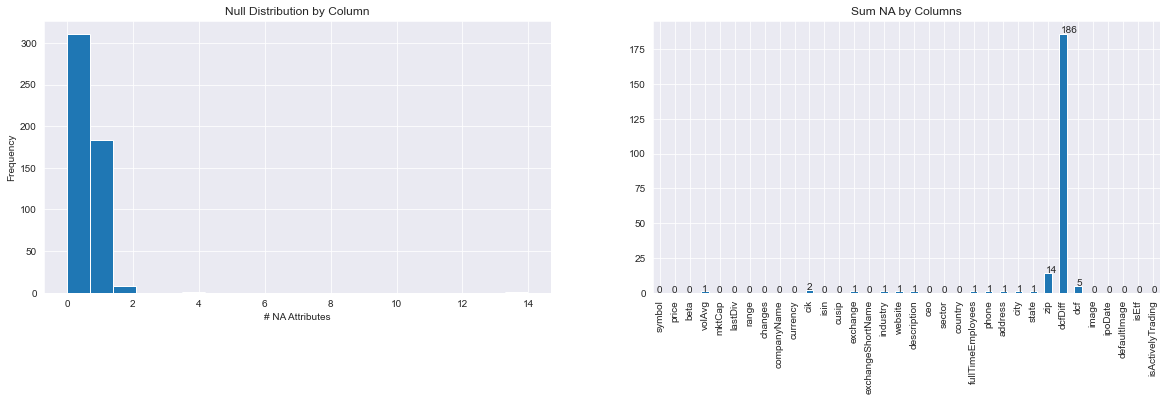

In [64]:
#check Missing Data for profiles
fig,axes = plt.subplots(1,2,figsize=(20,5))
print('Total Null For Stocks Profiles:',profiles[stocks].isnull().sum().sum())
ax1 = profiles[stocks].isnull().sum(axis=1).plot(kind='hist',bins = 20,ax=axes[0])
ax1.set_title('Null Distribution by Column')
ax1.set_xlabel('# NA Attributes')
ax2 = profiles[stocks].isnull().sum().plot(kind='bar',ax=axes[1])
for p in ax2.patches: #https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots
    ax2.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
ax2.set_title('Sum NA by Columns')
plt.show()

In [345]:
import warnings ##Not useful for this file's purposes, except to get in the way
warnings.filterwarnings("ignore")

In [346]:
#global constant example
ZIP_FILL = '000000'
zip_fill_index = profiles[stocks][profiles[stocks].zip.isnull()].index
profiles[stocks].loc[zip_fill_index,'zip'] = ZIP_FILL
##ignore pandas warning, only for example

In [359]:
#check missing data for prices 
prices = getTable('../../FinancesSp500.db','TS_PRICE_DAY')

In [360]:
prices.isnull().sum()

date                 0
open                 0
high                 0
low                  0
close                0
adjClose             0
volume              11
unadjustedVolume    11
change               0
changePercent        0
vwap                11
label                0
changeOverTime       0
symbol               0
dtype: int64

In [361]:
#take a look @ price columns with null values
prices[prices.isnull().any(1)]

,date,open,high,low,close,adjClose,volume,unadjustedVolume,change,changePercent,vwap,label,changeOverTime,symbol
4056124,2012-11-13,46.88,46.88,46.88,46.88,38.32,NaN,NaN,0.00,0.00,NaN,"November 13, 12",0.00,IEFA
4056135,2012-10-25,47.54,47.54,47.54,47.54,38.85,NaN,NaN,0.00,0.00,NaN,"October 25, 12",0.00,IEFA
4087050,2012-03-13,24.89,24.89,24.89,24.89,22.35,NaN,NaN,0.00,0.00,NaN,"March 13, 12",0.00,GOVT
4087051,2012-03-12,24.89,24.89,24.89,24.89,22.35,NaN,NaN,0.00,0.00,NaN,"March 12, 12",0.00,GOVT
4087055,2012-03-06,24.82,24.82,24.82,24.82,22.29,NaN,NaN,0.00,0.00,NaN,"March 06, 12",0.00,GOVT
4087056,2012-03-05,24.82,24.82,24.82,24.82,22.29,NaN,NaN,0.00,0.00,NaN,"March 05, 12",0.00,GOVT
4087057,2012-03-02,24.82,24.82,24.82,24.82,22.29,NaN,NaN,0.00,0.00,NaN,"March 02, 12",0.00,GOVT
4087058,2012-03-01,24.82,24.82,24.82,24.82,22.29,NaN,NaN,0.00,0.00,NaN,"March 01, 12",0.00,GOVT
4087059,2012-02-29,24.82,24.82,24.82,24.82,22.29,NaN,NaN,0.00,0.00,NaN,"February 29, 12",0.00,GOVT
4087060,2012-02-28,24.82,24.82,24.82,24.82,22.29,NaN,NaN,0.00,0.00,NaN,"February 28, 12",0.00,GOVT


In [442]:
#very crude imputation function from scratch
def fillTS(df,col):
    '''Impute time series data'''
    index = df[df[col].isnull()].index
    
    for i in index:
        
        ticker = df.loc[i,'symbol']
        date = df.loc[i,'date']
        
        prevDate = df[(df.date<date) & (df.symbol == ticker)].date.max()
        nextDate = df[(df.date>date) & (df.symbol == ticker)].date.min()
        while (True):
            if prevDate: #if prevdate for same symbol, set to that values
                newval = df[(df.date==prevDate)&(df.symbol==ticker)].loc[:,col].values[0]
                if ~np.isnan(newval):
                    df.loc[i,col] = newval
                    #print('Set on PREV')
                    break
            if nextDate: #else set to nextdates value for same symol
                newval = df[(df.date==nextDate)&(df.symbol==ticker)].loc[:,col].values[0]
                if ~np.isnan(newval):
                    df.loc[i,col] = newval
                    #print('Set on NEXT')
                    break
        
            print('SET TO 0')
            df.loc[i,col] = 0.0
            
    return df[col]    

In [443]:
prices2 = prices.copy()
prices2['volume'] = fillTS(prices2,'volume')
prices2.volume.isnull().sum()

Set on PREV
Set on PREV
Set on NEXT
Set on PREV
Set on NEXT
Set on NEXT
Set on NEXT
Set on NEXT
Set on NEXT
Set on NEXT
Set on PREV


0

quick notes – any iterative program like this would be a gigantic bottleneck, but this gets the idea accross

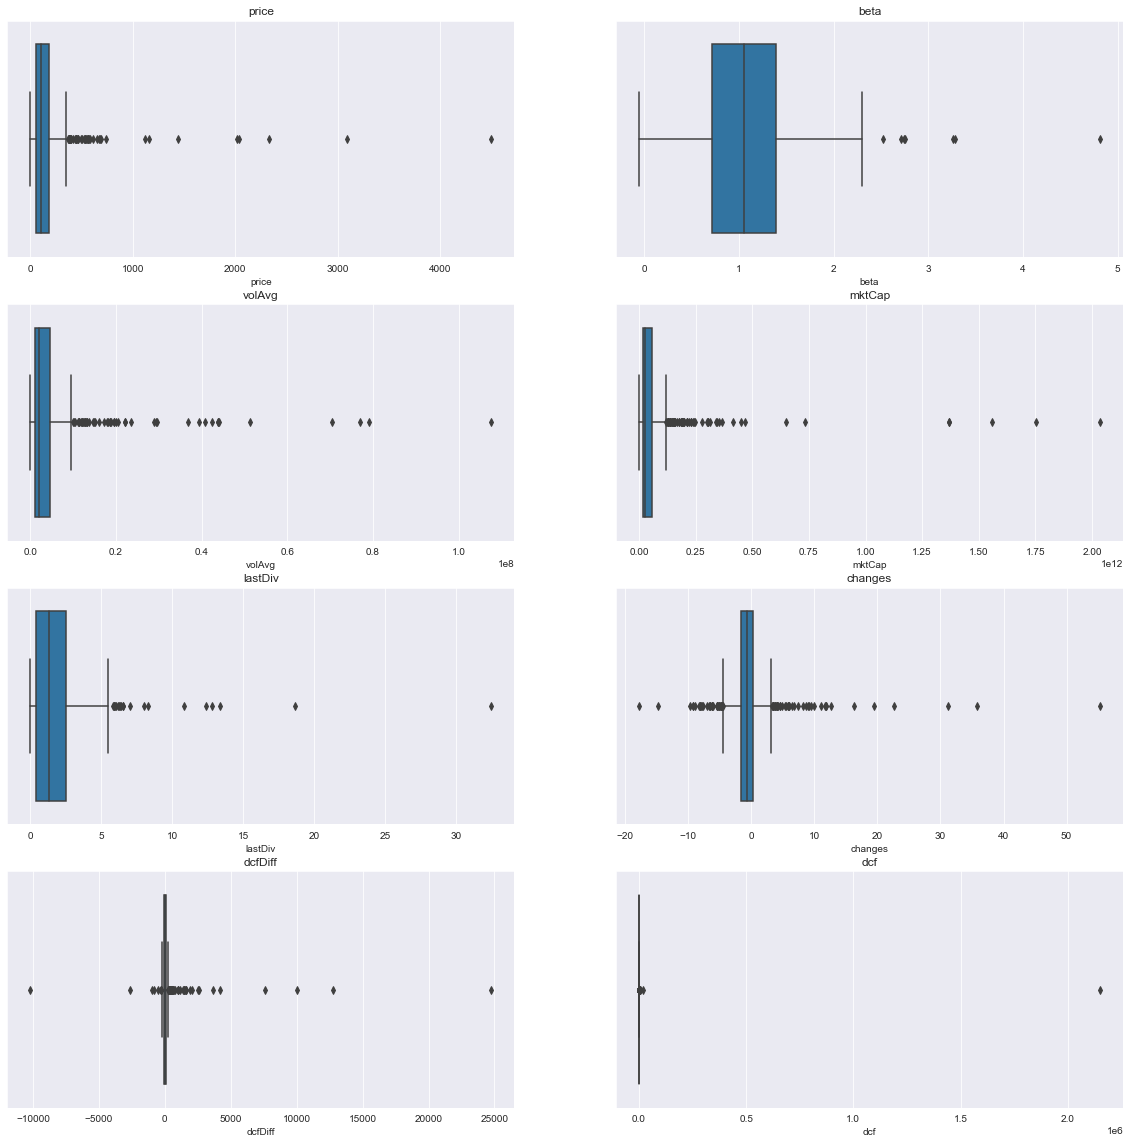

In [519]:
#Noisy data? quick check for outliers in continuous variables
stockdf = profiles[stocks] #..finally. 

#get continuous variable list
cont_columns = [col for col in stockdf.describe().columns if 'is' not in col.lower()]
cont_columns.remove('cik')
cont_columns.remove('defaultImage')

N_COLS = len(cont_columns)
COL_PROW = 2 #decide on number of columns per row– helps to find best view 
fig, axes = plt.subplots(int(np.ceil(N_COLS/COL_PROW)),COL_PROW,figsize = (20,20))

for i, contcol in enumerate(cont_columns):
    row = i // COL_PROW
    col = i % COL_PROW 
    #ax = sns.violinplot(stockdf[contcol],ax=axes[row,col],orient='h')
    ax = sns.boxplot(stockdf[contcol],ax=axes[row,col],orient='h')
    ax.set_title(contcol)
plt.show();

quick notes – dcf is really the only one where there seems to be a mistake/real outlier. The others can be handled with logging and other techniques

In [521]:
##Lets do a quick cleaning of this column (which would not make sense in real life)

#for missing data, lets assign class mean! this solut
dcf_null = stockdf[stockdf.dcf.isnull()].index
print(len(dcf_null),'NULL vals in dcf')
means = stockdf.groupby('sector')['dcf'].mean().to_dict()

5 NULL vals in dcf


In [524]:
stockdf.loc[dcf_null,'dcf'] = stockdf.loc[dcf_null].T.apply(lambda x: means.get(x.sector))

print(stockdf.dcf.isnull().sum(),'NULLS after apply')

0 NULLS after apply


quick notes– scratch solution a bit wonky due to the transposition of df in order to use apply correctly.. actually gave me some insight into writing lambdas

Before binning outlier


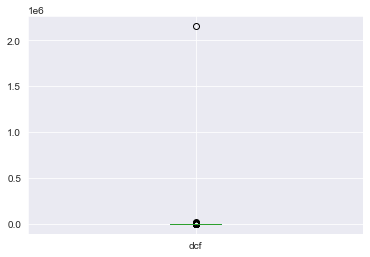

After binning outlier


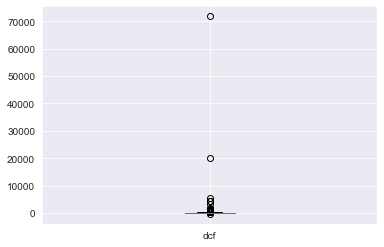

In [534]:
#okay, onto outlier
print('Before binning outlier')
stockdf['dcf'].plot(kind='box')
plt.show();
#assign noisy variable to class mean
outlier_index = stockdf[stockdf.dcf == stockdf.dcf.max()].index
stockdf.loc[outlier_index,'dcf'] = means.get(stockdf.loc[outlier_index,'sector'].values[0])
print('After binning outlier')
stockdf['dcf'].plot(kind='box')
plt.show();

quick notes– looks like there are still some outliers that may be enough dev to cause some issues, but the obvious mistake has been corrected. 
    This may benefit from further smoothing, etc.

In [548]:
#hit the dcf with some equi-depth partitioning
new_dcf = pd.qcut(stockdf.dcf,q=3)
stocks.dcf = new_dcf

In [550]:
stocks.dcf

1      (-288.71099999999996, 61.015]
2      (-288.71099999999996, 61.015]
3      (-288.71099999999996, 61.015]
4      (-288.71099999999996, 61.015]
6      (-288.71099999999996, 61.015]
                   ...              
611                (61.015, 143.538]
612             (143.538, 71836.941]
615    (-288.71099999999996, 61.015]
616    (-288.71099999999996, 61.015]
617    (-288.71099999999996, 61.015]
Name: dcf, Length: 504, dtype: category
Categories (3, interval[float64]): [(-288.71099999999996, 61.015] < (61.015, 143.538] < (143.538, 71836.941]]

<a id='L3'></a> 
## L3